In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


* `step` : representa uma unidade de tempo onde 1 passo equivale a 1 hora

* `type`: tipo de transação online

* `amount`: o valor da transação

* `nameOrig`: cliente iniciando a transação

* `oldbalanceOrg:` saldo antes da transação

* `newbalanceOrig:` saldo após a transação

* `nameDest:` destinatário da transação

* `oldbalanceDest:` saldo inicial do destinatário antes da transação

* `newbalanceDest:` o novo saldo do destinatário após a transação

* `isFraud:` transação fraudulenta

###Carregando os dados!

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos DS/Risco de Credito/onlinefraud.csv')

In [3]:
df.rename(columns={"type":"tipo"}, inplace=True)

In [4]:
df.head(10)

,step,tipo,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [5]:
df.shape

(6362620, 11)

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
df.dtypes

step                int64
tipo               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [8]:
df.isnull().sum()
#O dataset não possui valores faltantes!

step              0
tipo              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<ipython-input-9-f38dc5767e9c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


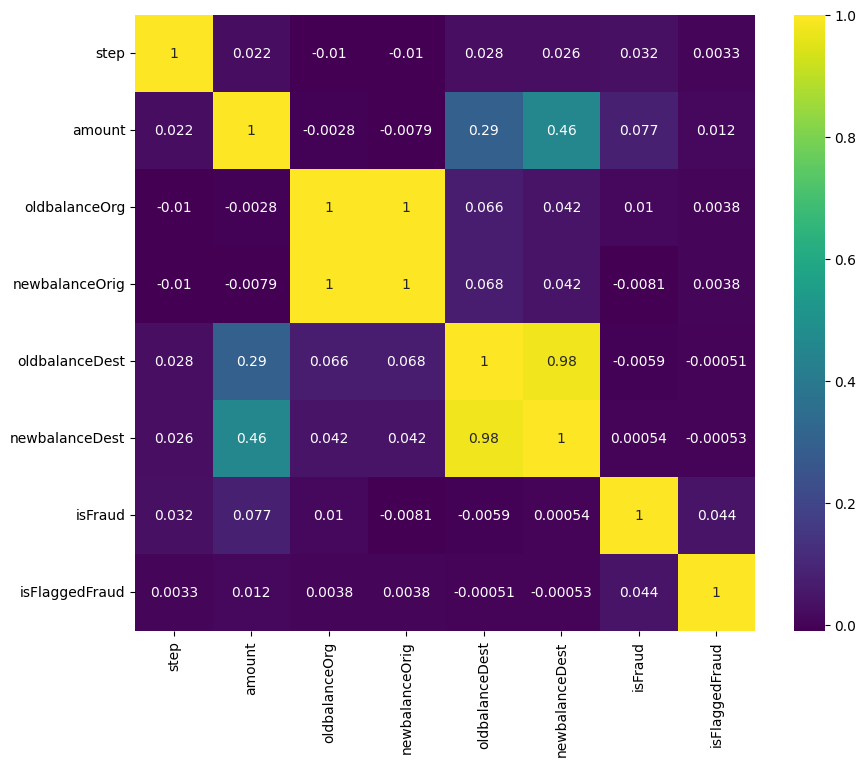

In [9]:
corr = df.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr, annot = True, cmap = 'viridis')

plt.show()

In [10]:
stepby = df.step.value_counts()

stepby

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

In [11]:
countpay = df.tipo.value_counts()
countpay


CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: tipo, dtype: int64

Text(0, 0.5, 'Numero de transações')

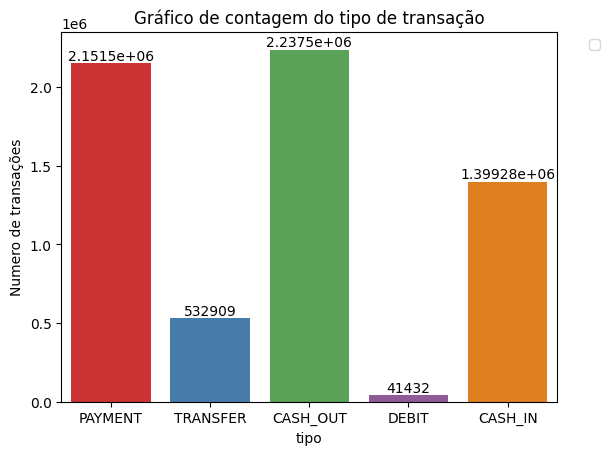

In [12]:
ax = sns.countplot(x='tipo', data=df, palette='Set1')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Gráfico de contagem do tipo de transação')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.ylabel('Numero de transações')

<Axes: xlabel='tipo', ylabel='amount'>

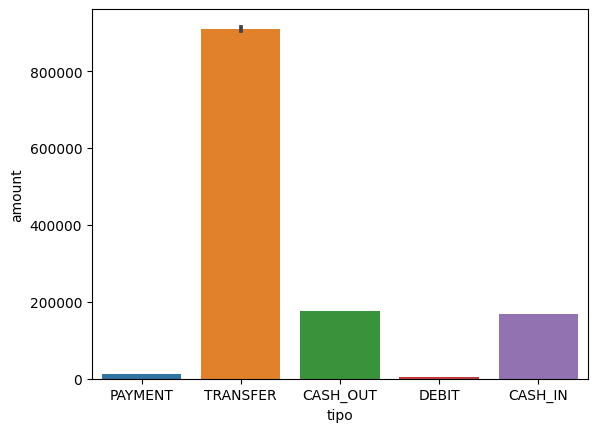

In [13]:
sns.barplot(x = 'tipo', y='amount', data = df )

In [14]:
df[df['isFraud']==1]['tipo'].value_counts()

CASH_OUT    4116
TRANSFER    4097
Name: tipo, dtype: int64

<Axes: xlabel='tipo', ylabel='count'>

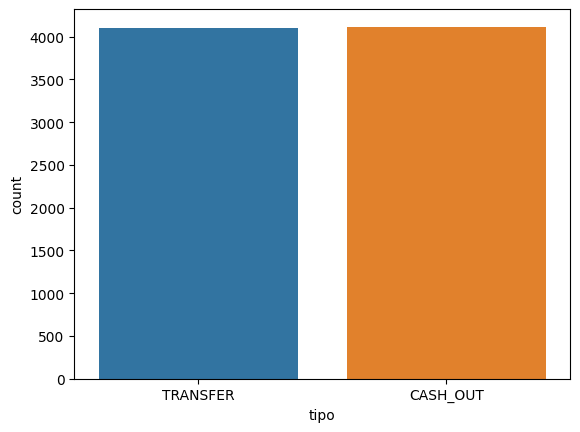

In [15]:
sns.countplot(x = df[df['isFraud']==1]['tipo'], data = df)


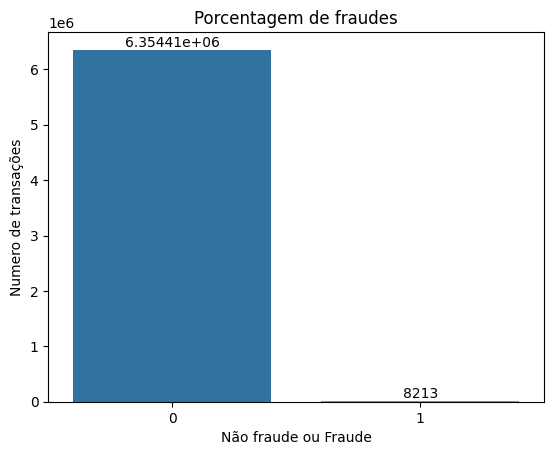

In [16]:
ax = sns.countplot( x = 'isFraud', data = df)
for container in ax.containers:
    ax.bar_label(container)

plt.title('Porcentagem de fraudes')
plt.ylabel('Numero de transações')
plt.xlabel('Não fraude ou Fraude')
plt.show()

In [17]:
df.isFraud.value_counts()


0    6354407
1       8213
Name: isFraud, dtype: int64

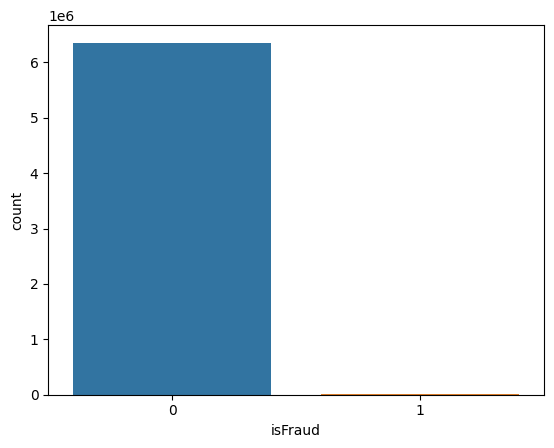

In [18]:
sns.countplot(x = 'isFraud',data = df)
plt.show()

In [19]:
percent = 8213/6354407
print(f' {percent*100:,.6f}%')

 0.129249%


In [20]:
df.isFlaggedFraud.value_counts()


0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

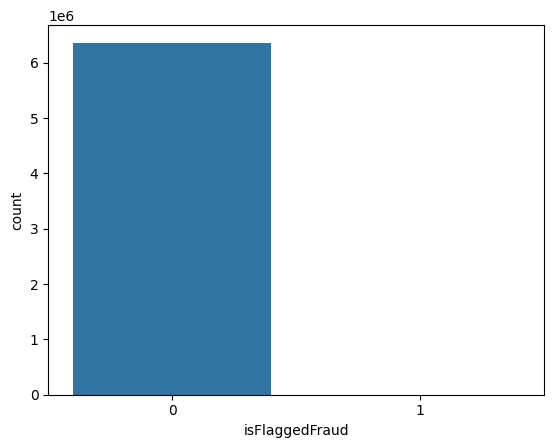

In [21]:
sns.countplot( x = 'isFlaggedFraud', data = df)
plt.show